In [60]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
import itertools

In [90]:
def plot_sentiments(column):
  add='/content/drive/MyDrive/Amber_Heard_Johnny_Depp_data/Sentiment/'
  fig, ax=plt.subplots(nrows=2,ncols=2,dpi=200, figsize=(12,10))

  ax=ax.flat
  for j, data in enumerate(['sentiment_team_April1_clean.csv','sentiment_team_April22_clean.csv','sentiment_team_May5_clean.csv','sentiment_team_June1_clean.csv']):
    print(data, 'started')
    df=pd.read_csv(add+data, dtype = {'id':str, 'author_id':str, 'in_reply_to_user_id':str})
    x,y = column, 'label'
    if column=='subgroup':
      order=['Support_AH','Hostile_JD','Support_JD','Hostile_AH','other','unclassified']
    else:
      order=['Team_Johnny','Team_Amber','unclassified']
    d=df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().sort_values(by=[x])
    labels=['positive', 'neutral', 'negative']
    for i, color in enumerate(['#3FE758', '#FFBF00', '#FF7F50']):
        sns.barplot(data=d[d['label'].isin(labels[i:])], x=column, y='percent', estimator=sum, ci=None, saturation=0.9,
                    color=color, label=labels[i], ax=ax[j],order=order)
        sns.set_style("ticks")
    ax[j].set_ylim(0,100)
    ax[j].set_title(data.split('_')[2],fontsize=20)
    ax[j].tick_params(axis='x', rotation=30)


  for j in range(len(ax)):
    for i, bar in enumerate(ax[j].patches):
      if column=='subgroup':
        value=[4,5]
      else:
        value=[2]
      if i %len(order) in value:
            bar.set_hatch('x')

  lines_labels = [ax[0].get_legend_handles_labels()]
  lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
  fig.legend(lines, labels,loc="lower center", ncol = 3,fontsize=20, fancybox=True, shadow=True,bbox_to_anchor=(0.5, 1.0))
  fig.tight_layout()
  fig.savefig(add+column+'_sentiment.png')

sentiment_team_April1_clean.csv started
sentiment_team_April22_clean.csv started
sentiment_team_May5_clean.csv started
sentiment_team_June1_clean.csv started


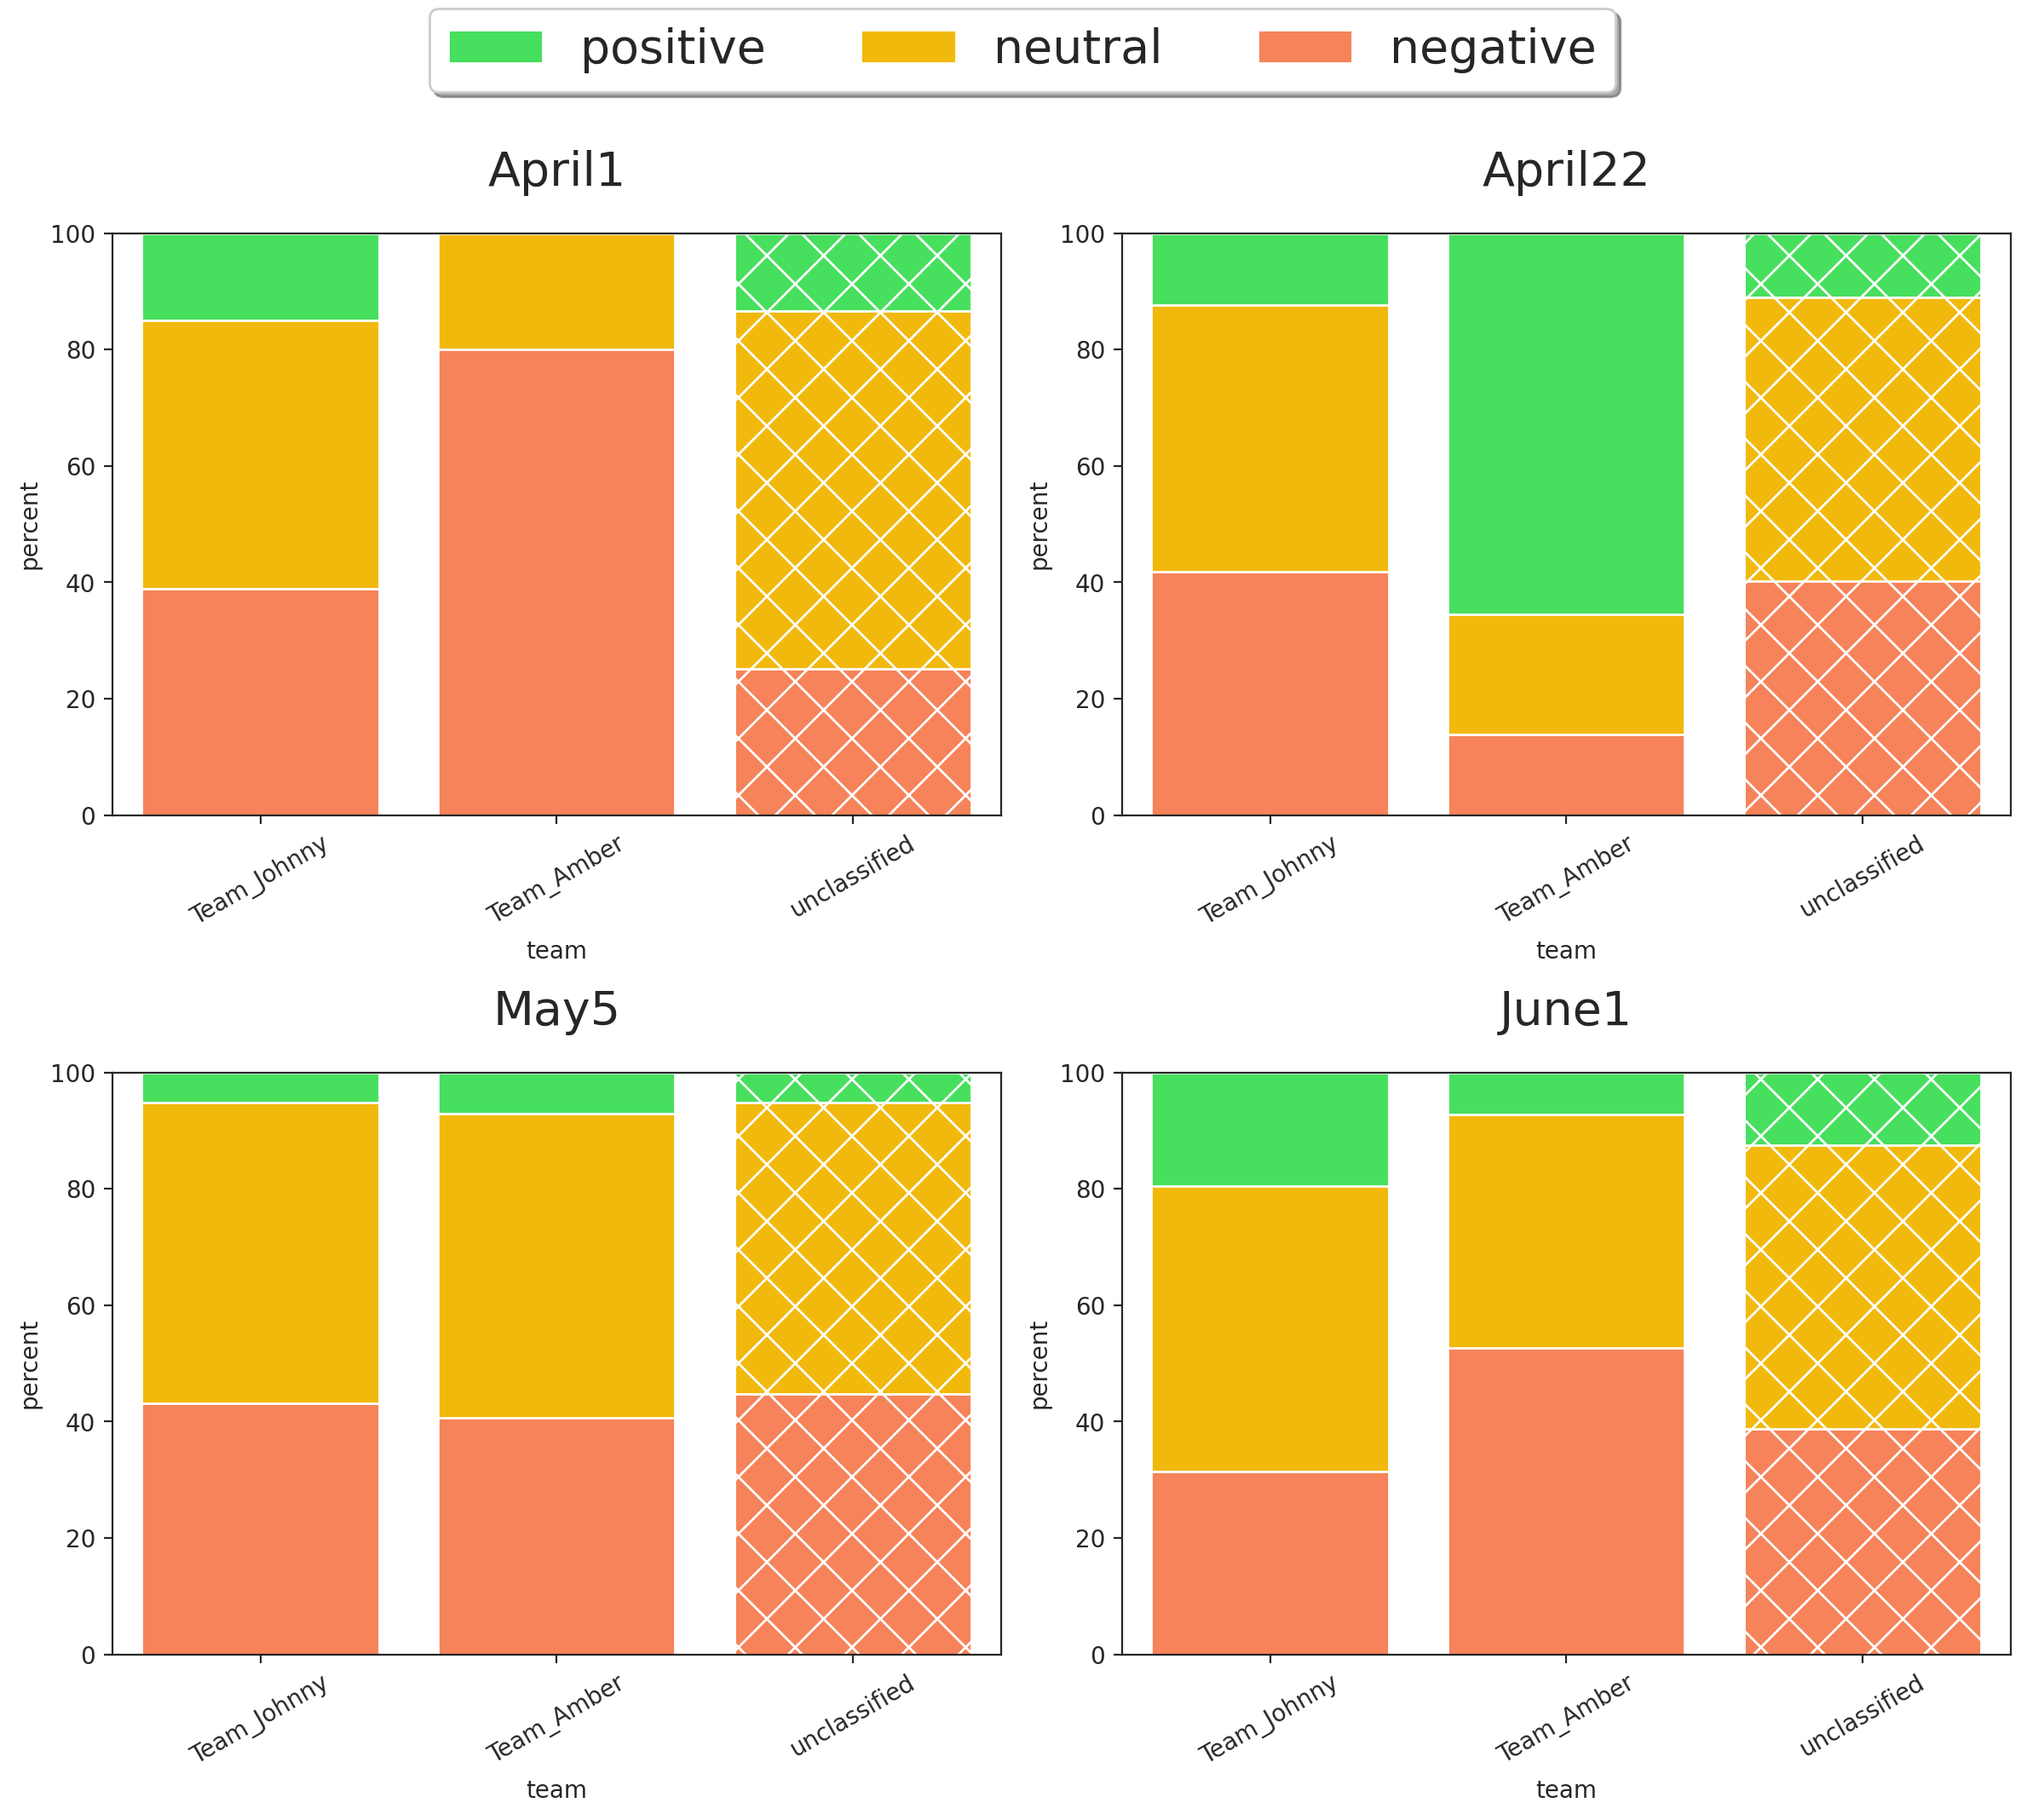

In [91]:
plot_sentiments('team')

sentiment_team_April1_clean.csv started
sentiment_team_April22_clean.csv started
sentiment_team_May5_clean.csv started
sentiment_team_June1_clean.csv started


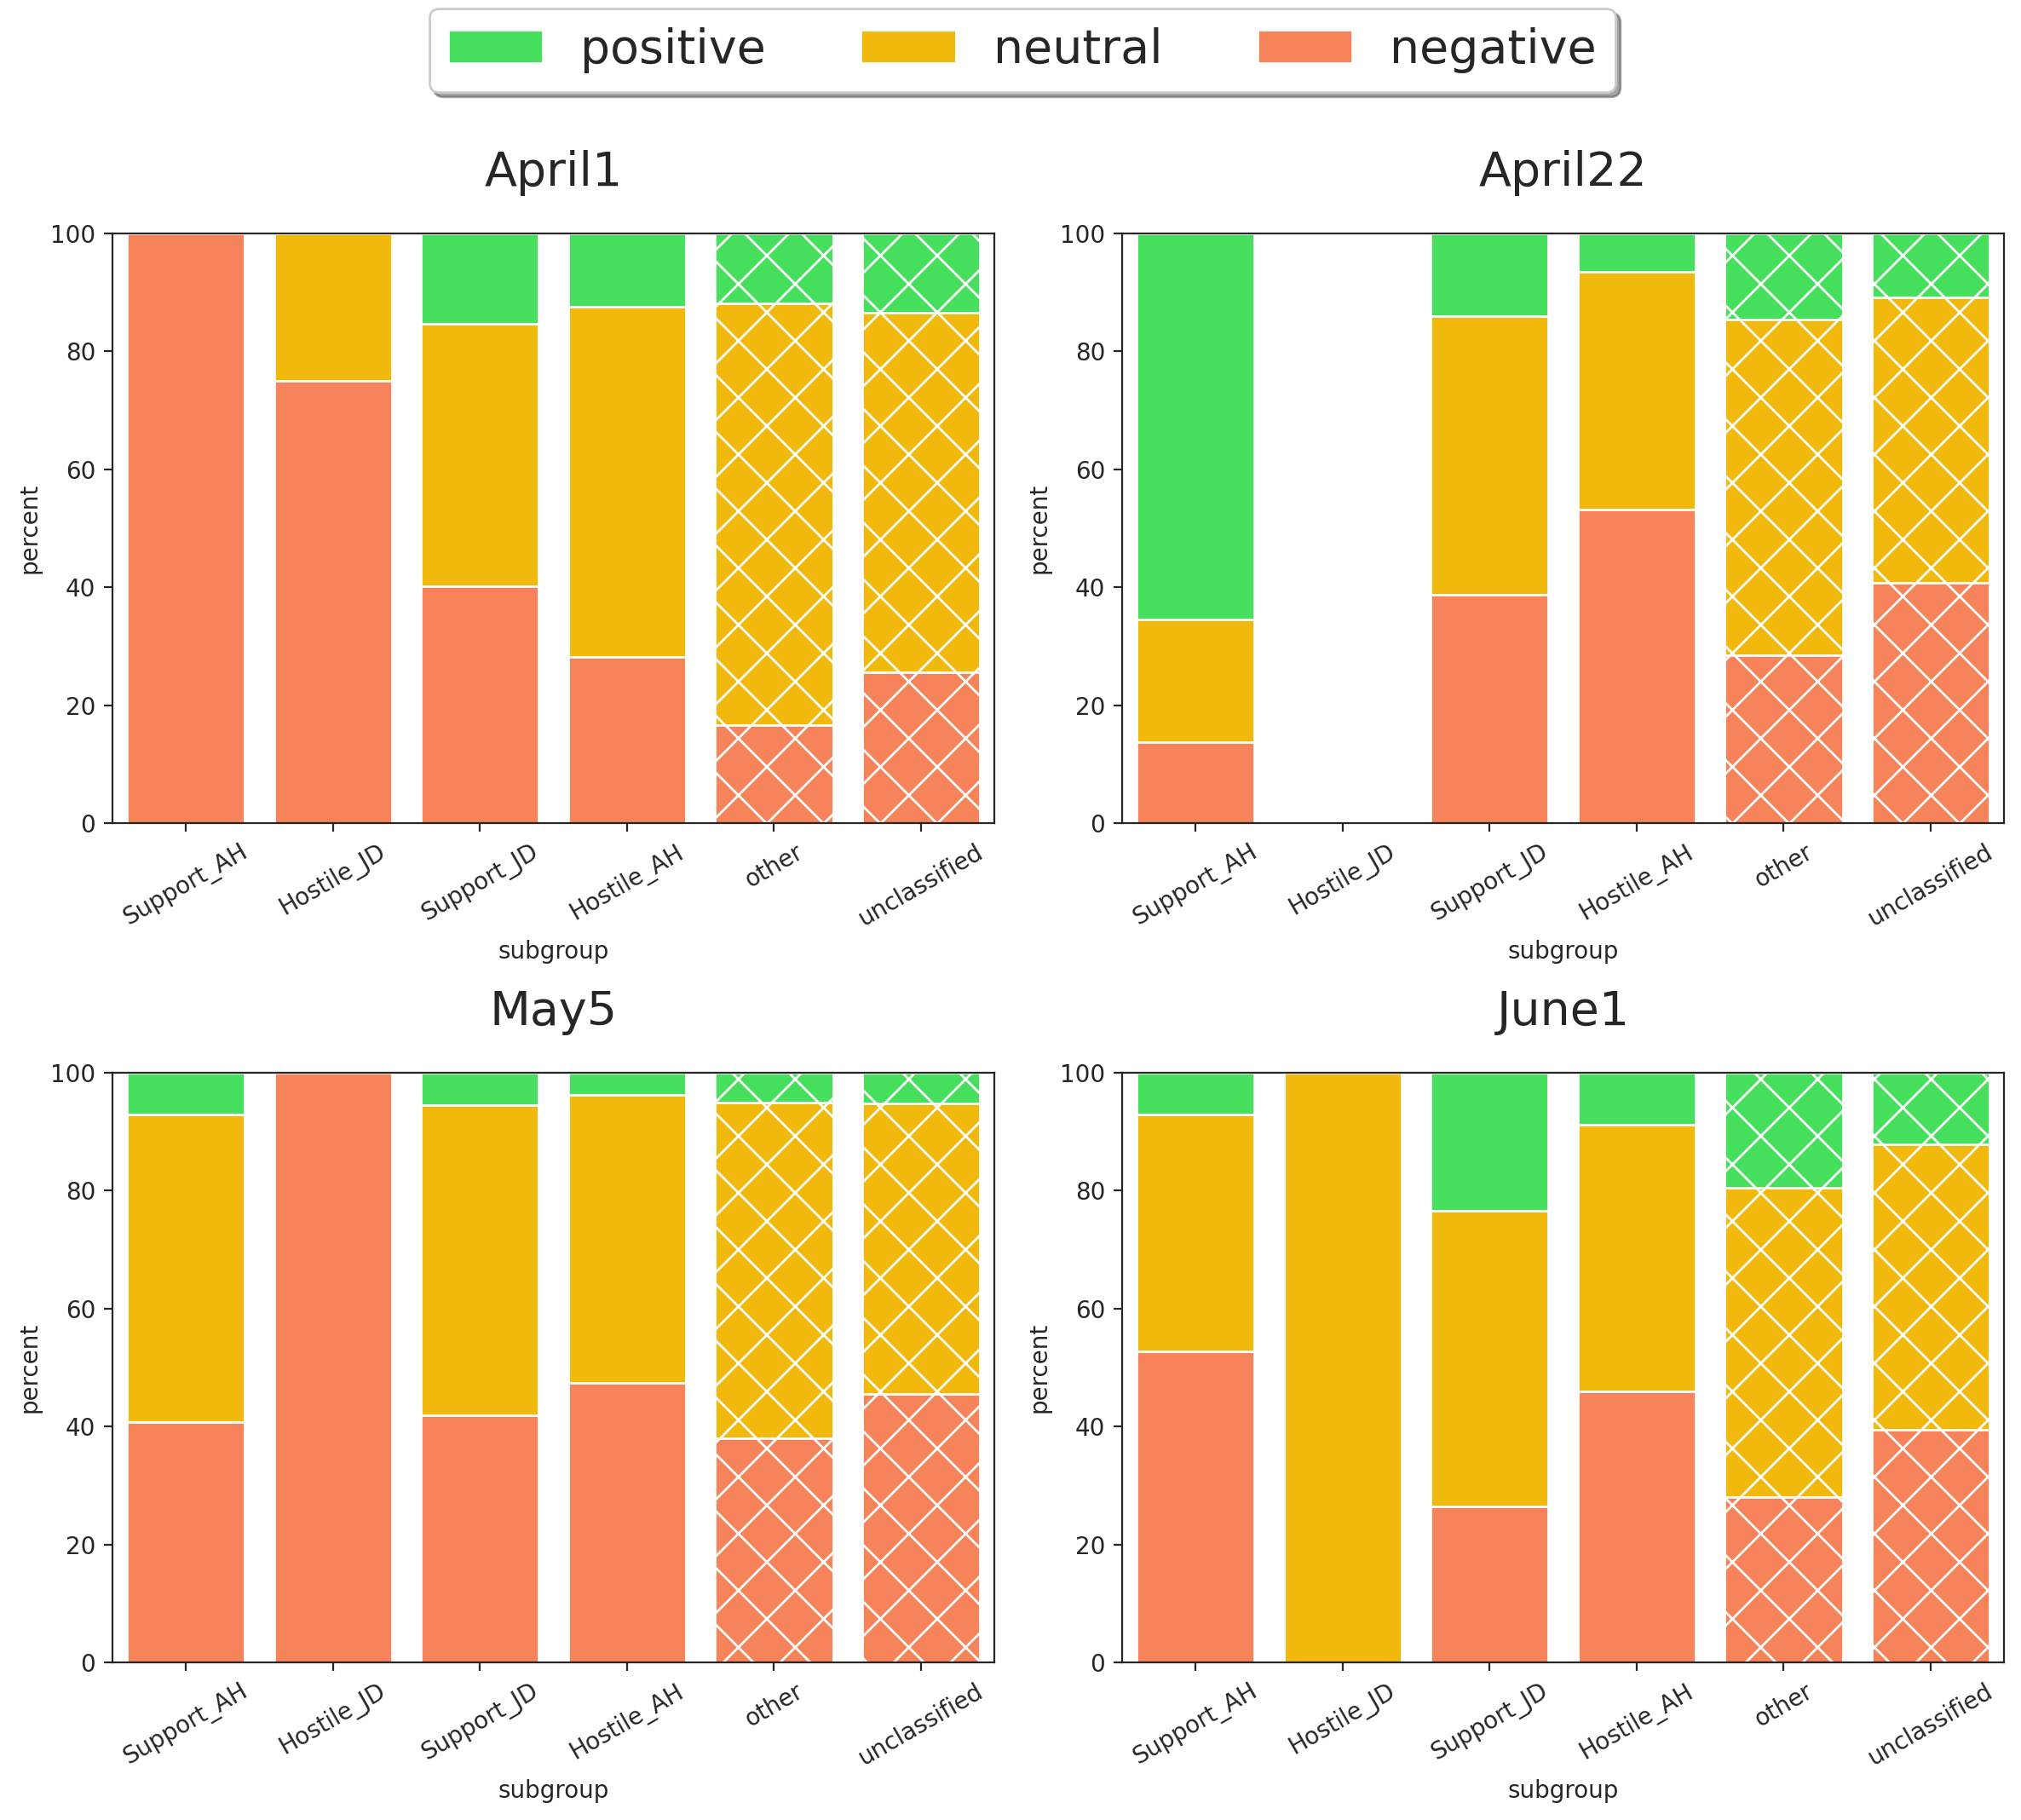

In [92]:
plot_sentiments('subgroup')